# Testing different SA methods 4/5
## Textblob


In [21]:
import csv
import re
import random

from textblob import TextBlob

# Ugly hackery, but necessary: stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.append('../../../')
    
from src.streaming import spark_functions

In [46]:
preprocess = spark_functions.preprocessor()
tokenize = spark_functions.tokenizer()

with open('./../../../data/interim/sanders_hydrated.csv') as csv_file:
    iterator = csv.reader(csv_file, delimiter=',')
    # Load the parts we need and preprocess as well as tokenize the text
    tweets = [(text, sentiment) for (topic, sentiment, id, text) in iterator if sentiment=='positive' or sentiment=='negative']
    # Shuffle for good measure
    random.shuffle(tweets)

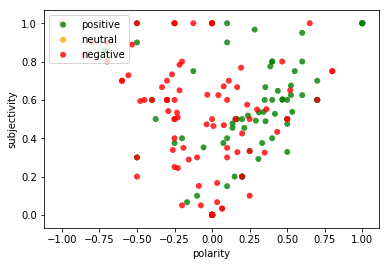

In [48]:
import matplotlib.pyplot as plt

results = {
    "positive":{"color":"green","x":[],"y":[]},
    "neutral":{"color":"orange","x":[],"y":[]},
    "negative":{"color":"red","x":[],"y":[]}
}
                        
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for (tweet,sentiment) in tweets[:200]:
    analysis = TextBlob(preprocess(tweet)).sentiment
    results[sentiment]["x"].append(analysis.polarity)
    results[sentiment]["y"].append(analysis.subjectivity)
    
for key in results:
    ax.scatter(results[key]["x"], results[key]["y"], alpha=0.8, c=results[key]["color"], edgecolors='none', label=key)
 
plt.xlabel('polarity')
plt.ylabel('subjectivity')

plt.legend(loc=2)
plt.savefig('textblob.pdf', format='pdf')
plt.show()

In [50]:
# This is fucking hopeless
labeled_correctly = 0
for (tweet,sentiment) in tweets:
    analysis = TextBlob(preprocess(tweet)).sentiment
    if (analysis.polarity < 0 and sentiment == 'negative') \
    or (analysis.polarity >= 0 and sentiment == 'positive'):
        labeled_correctly += 1

print("Labeled correctly: %d/%d = %.2d percent" % (labeled_correctly, len(tweets), labeled_correctly/len(tweets)*100))

Labeled correctly: 580/946 = 61 percent
